In [1]:
import ast
import numpy as np
import time
import sys
import pandas as pd
import subprocess
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import validation_curve
import random as rand
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
import time
import math

In [ ]:
from flt3_data_loading import km_normed_1, flt3_filtered
x_train, x_test, y_train, y_test = train_test_split(km_normed_1, flt3_filtered, random_state=0)

/u/maruize/miniconda3/envs/stage2020/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


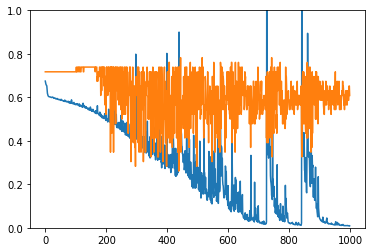

0.7368329868329868


In [4]:
# 100 batch size + low validation fraction + adaptive lr 
classifier_norm_1 = MLPClassifier(hidden_layer_sizes=(2048,512,128,32,8), 
                           max_iter=1000, 
                           activation = 'relu', 
                           solver='sgd', 
                           learning_rate='adaptive', 
                           tol=0, shuffle=True, 
                           random_state=3, verbose=0,
                           batch_size=100
                           #)
                           ,early_stopping=True, n_iter_no_change=1000, 
                           validation_fraction=0.1)
classifier_norm_1.fit(km_normed_1, flt3_filtered)
plt.plot(classifier_norm_1.loss_curve_)
plt.plot(classifier_norm_1.validation_scores_)
plt.ylim(0, 1)
plt.show()

y_pred = classifier_norm_1.predict(x_test)
print(roc_auc_score(y_test, y_pred))

In [3]:
# ROCAUC over epochs, also more accurate loss plotting?
classifier_partial = MLPClassifier(hidden_layer_sizes=(2048,512,128,32,8), 
                           max_iter=1000, 
                           activation = 'relu', 
                           solver='sgd', 
                           learning_rate='adaptive', 
                           tol=0, shuffle=True, 
                           random_state=3, verbose=0,
                           batch_size=100
                           )
                           #,early_stopping=True, n_iter_no_change=1000 
                           #,validation_fraction=0.1)
scores = []
training = []
validation = []
for i in range(1000):
    classifier_partial.partial_fit(x_train, y_train, classes=(0,1))
    t_loss = classifier_partial.loss_
    v_loss = classifier_partial.score(x_test, y_test)
    scores.append(roc_auc_score(y_test, classifier_partial.predict(x_test)))
    training.append(t_loss)
    validation.append(v_loss)
    if (i+1) % 100 == 0 or i == 0:
        print(f"\r{time.strftime('%H:%M:%S', time.localtime())}: {math.floor((i+1)/10)}% complete", end='')

19:43:57: 100% complete

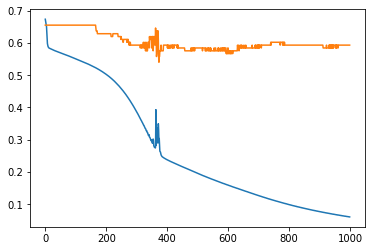

0.5012127512127511


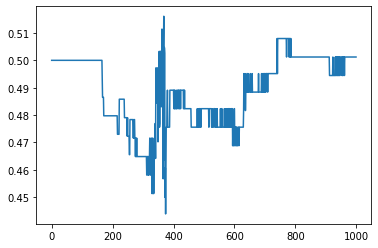

In [4]:
plt.plot(training)
plt.plot(validation)
plt.show()
plt.plot(scores)
print(scores[-1])

/u/maruize/miniconda3/envs/stage2020/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


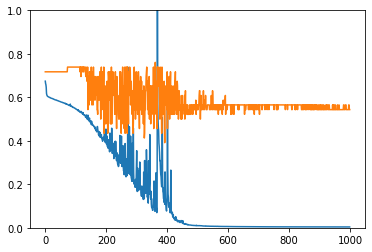

0.7948717948717949


In [10]:
# 64 batch size + low validation fraction + adaptive lr
classifier_norm_1 = MLPClassifier(hidden_layer_sizes=(2048,512,128,32,8), 
                           max_iter=1000, 
                           activation = 'relu', 
                           solver='sgd', 
                           learning_rate='adaptive', 
                           tol=0, shuffle=True, 
                           random_state=3, verbose=0,
                           batch_size=64
                           #)
                           ,early_stopping=True, n_iter_no_change=1000, 
                           validation_fraction=0.1)
classifier_norm_1.fit(km_normed_1, flt3_filtered)
plt.plot(classifier_norm_1.loss_curve_)
plt.plot(classifier_norm_1.validation_scores_)
plt.ylim(0, 1)
plt.show()
y_pred = classifier_norm_1.predict(x_test)
print(roc_auc_score(y_test, y_pred))

/u/maruize/miniconda3/envs/stage2020/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


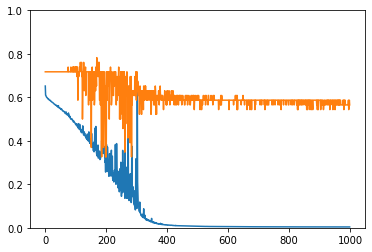

0.8214285714285714


In [3]:
# Same thing but random_state=0, and matching test set outside and inside the model (in theory)
x_train, x_test, y_train, y_test = train_test_split(km_normed_1, flt3_filtered, test_size=0.1, random_state=0)
classifier_norm_1 = MLPClassifier(hidden_layer_sizes=(2048,512,128,32,8), 
                           max_iter=1000, 
                           activation = 'relu', 
                           solver='sgd', 
                           learning_rate='adaptive', 
                           tol=0, shuffle=True, 
                           random_state=0, verbose=0,
                           batch_size=64
                           #)
                           ,early_stopping=True, n_iter_no_change=1000, 
                           validation_fraction=0.1)
classifier_norm_1.fit(km_normed_1, flt3_filtered)
plt.plot(classifier_norm_1.loss_curve_)
plt.plot(classifier_norm_1.validation_scores_)
plt.ylim(0, 1)
plt.show()
y_pred = classifier_norm_1.predict(x_test)
print(roc_auc_score(y_test, y_pred))

In [3]:
# Same thing but random_state=0, and matching test set outside and inside the model (in theory) + logistic!
x_train, x_test, y_train, y_test = train_test_split(km_normed_1, flt3_filtered, test_size=0.1, random_state=0)
classifier_logistic = MLPClassifier(hidden_layer_sizes=(2048,512,128,32,8), 
                           max_iter=10000, 
                           activation = 'logistic', 
                           solver='sgd', 
                           learning_rate='adaptive', 
                           tol=0, shuffle=True, 
                           random_state=0, verbose=0,
                           batch_size=64, n_iter_no_change=10000
                           )
classifier_logistic.fit(x_train, y_train)

/u/maruize/miniconda3/envs/stage2020/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', batch_size=64,
              hidden_layer_sizes=(2048, 512, 128, 32, 8),
              learning_rate='adaptive', max_iter=10000, n_iter_no_change=10000,
              random_state=0, solver='sgd', tol=0, verbose=0)

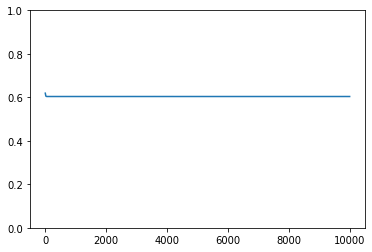

0.5


In [4]:
plt.plot(classifier_logistic.loss_curve_)
#plt.plot(classifier_logistic.validation_scores_)
plt.ylim(0, 1)
plt.show()
y_pred = classifier_logistic.predict(x_test)
print(roc_auc_score(y_test, y_pred))

/u/maruize/miniconda3/envs/stage2020/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


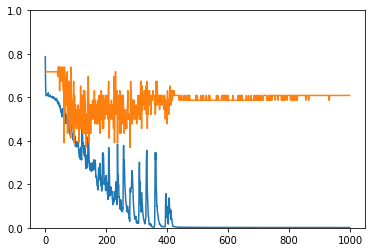

0.5512820512820513


In [9]:
# 64 batch size + low validation fraction + adam solver
classifier_norm_1 = MLPClassifier(hidden_layer_sizes=(2048,512,128,32,8), 
                           max_iter=1000, 
                           activation = 'relu', 
                           solver='adam', 
                           tol=0, shuffle=True, 
                           random_state=3, verbose=0,
                           batch_size=64
                           #)
                           ,early_stopping=True, n_iter_no_change=1000, 
                           validation_fraction=0.1)
classifier_norm_1.fit(km_normed_1, flt3_filtered)
plt.plot(classifier_norm_1.loss_curve_)
plt.plot(classifier_norm_1.validation_scores_)
plt.ylim(0, 1)
plt.show()
y_pred = classifier_norm_1.predict(x_test)
print(roc_auc_score(y_test, y_pred))

In [8]:
roc_auc_score(classifier_partial.predict(x_test), y_test)

0.5016908212560387

In [13]:
np.array(y_test)

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1])

In [18]:
classifier_partial.predict(x_test)

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1])